<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/Tensor2MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST work w/ Deep Learning w/ Python Text

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


(60000, 28, 28)


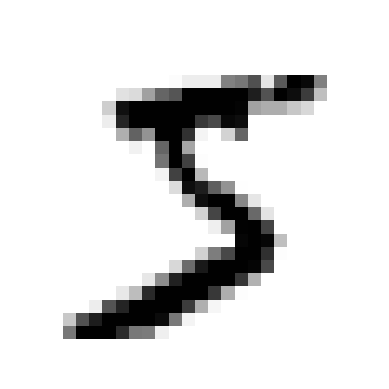

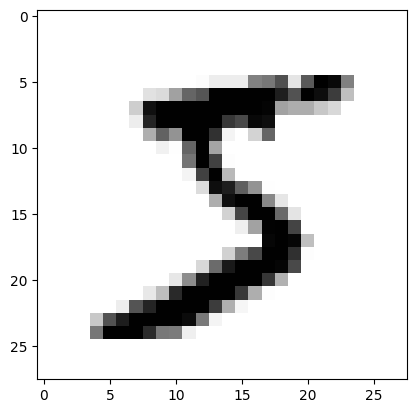

In [3]:
pI = lambda x: plt.imshow(x, cmap="binary"); plt.show()
print (train_images.shape)
plt.imshow(train_images[0].reshape((28,28)), cmap="binary")
plt.axis("off")
plt.show()

pI(train_images[0].reshape((28,28)))

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [6]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 18ms/step - loss: 1.0913 - accuracy: 0.7662
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5157 - accuracy: 0.8757
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4154 - accuracy: 0.8925
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3698 - accuracy: 0.8999
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3416 - accuracy: 0.9066


1/1 [==============================] - 0s 89ms/step
[[0.00377381 0.00168223 0.03169198 0.06682544 0.7602037  0.00565957
  0.00759924 0.0163772  0.00981097 0.09637588]] (1, 10)
Predict= 4 0.76


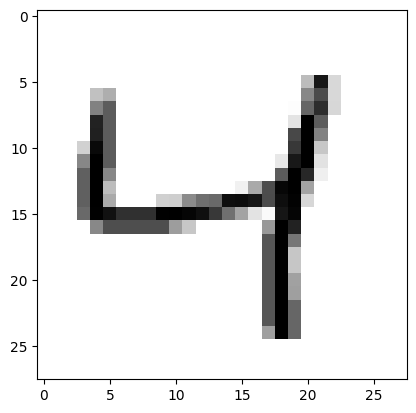

In [9]:
p_i = 2
p = model.predict(train_images[p_i].reshape(1,28*28))
print (p, p.shape)
print( "Predict=", np.argmax(p), round(p[0,np.argmax(p)],2))
pI(train_images[p_i].reshape((28,28)))

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9137
test_acc: 0.9136999845504761


# Convolutions

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(12, kernel_size=(3,3), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 flatten (Flatten)           (None, 8112)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                81130     
                                                                 
Total params: 81250 (317.38 KB)
Trainable params: 81250 (317.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
modelCNN.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 15s 30ms/step - loss: 0.3499 - accuracy: 0.9079
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1274 - accuracy: 0.9646
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0840 - accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0652 - accuracy: 0.9813
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0544 - accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0468 - accuracy: 0.9865
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0414 - accuracy: 0.9881
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0359 - accuracy: 0.9892
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0325 - accuracy: 0.9906
Epoch 10/10
469/469 [==============================] - 12s 25ms/step - loss: 0.028

In [16]:
test_digits = x_test[0:10]
predictions = modelCNN.predict(test_digits)
print(predictions[0])
print(predictions[0].argmax(), predictions[0][predictions[0].argmax()])
print(test_labels[0])

1/1 [==============================] - 0s 86ms/step
[7.7076734e-10 2.1887466e-12 2.2636630e-08 1.8249713e-05 5.3391856e-13
 2.7577760e-10 1.1763393e-15 9.9998134e-01 5.1801337e-08 2.5434733e-07]
7 0.99998134
7


In [17]:
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0619 - accuracy: 0.9809
test_acc: 0.98089998960495


# Test 2

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
modelCNN.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6757 - accuracy: 0.8303
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.9017
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3195 - accuracy: 0.9122
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.9172
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2879 - accuracy: 0.9199
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.9214
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.9243
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2694 - accuracy: 0.9250
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2653 - accuracy: 0.9261
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9278

In [22]:
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9257
test_acc: 0.9257000088691711


# Another Test

In [23]:
from keras.datasets import fashion_mnist

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


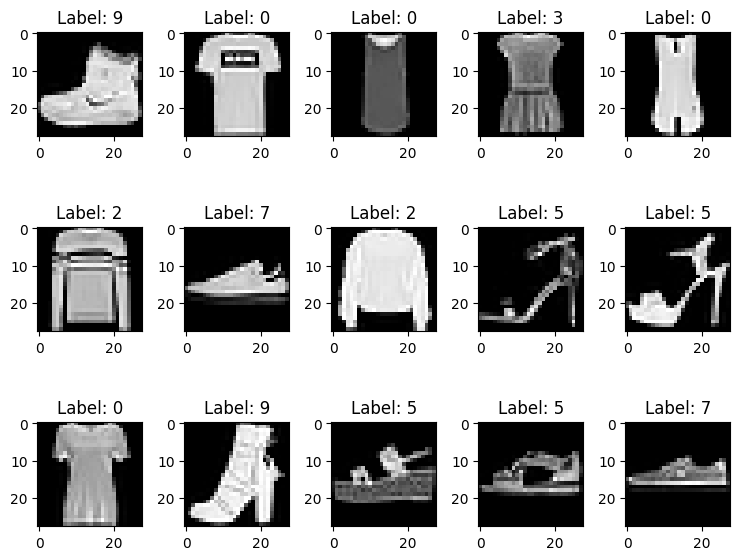

In [25]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [26]:
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
modelCNN.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7402 - accuracy: 0.7574
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.8271
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.8399
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4512 - accuracy: 0.8474
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4386 - accuracy: 0.8507
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8540
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4198 - accuracy: 0.8562
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4138 - accuracy: 0.8585
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4094 - accuracy: 0.8588
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8607

In [29]:
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8429
test_acc: 0.8428999781608582


1/1 [==============================] - 0s 57ms/step
[[2.4634503e-05 9.9993408e-01 4.7113035e-06 1.5732152e-05 2.0704369e-05
  3.4727136e-16 3.7983064e-08 5.0125071e-10 1.4560203e-07 3.1263877e-11]] (1, 10)
Predict= 1 1.0


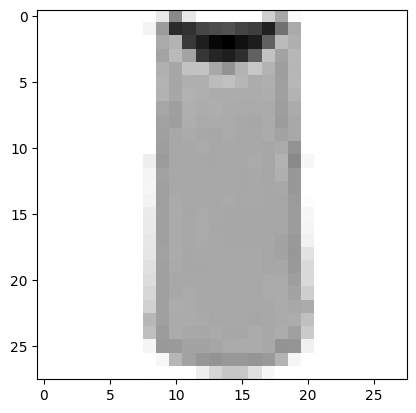

In [30]:
pi = 2
testI = x_test[pi].reshape((28,28,1))
testI = np.expand_dims(x_test[pi], 0)
p = modelCNN.predict(testI)
print (p, p.shape)
print( "Predict=", np.argmax(p), round(p[0,np.argmax(p)],2))
pI(x_train[p_i].reshape((28,28)))

In [31]:
test_digits = x_test[0:10]
predictions = modelCNN.predict(test_digits)
print(predictions[0])
print(predictions[0].argmax(), predictions[0][predictions[0].argmax()])
print(test_labels[0])

1/1 [==============================] - 0s 23ms/step
[1.3750486e-06 4.5414873e-07 2.3565513e-05 7.9543506e-06 2.0696298e-05
 1.3274021e-01 5.0564664e-05 1.4761604e-01 8.9835403e-03 7.1055561e-01]
9 0.7105556
7


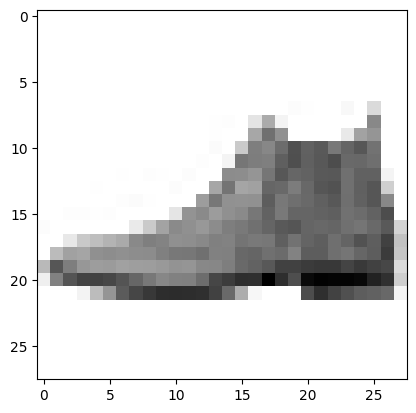

In [32]:
pI = lambda x: plt.imshow(x, cmap="binary"); plt.show()
pI(x_test[0])

In [33]:
modelCNN2 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(12, kernel_size=(3,3), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelCNN2.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.4987 - accuracy: 0.8322
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3323 - accuracy: 0.8833
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2948 - accuracy: 0.8950
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2721 - accuracy: 0.9023
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2543 - accuracy: 0.9091
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.2408 - accuracy: 0.9144
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2286 - accuracy: 0.9189
Epoch 8/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2195 - accuracy: 0.9221
Epoch 9/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2087 - accuracy: 0.9262
Epoch 10/10
469/469 [==============================] - 12s 25ms/step - loss: 0.201

In [35]:
test_loss, test_acc = modelCNN2.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.2916 - accuracy: 0.8968
test_acc: 0.8967999815940857


1/1 [==============================] - 0s 77ms/step
[1.3525688e-07 1.4186794e-09 7.3694025e-08 4.8372581e-09 5.5385570e-08
 1.7713712e-03 4.9625773e-06 3.7407042e-03 9.0150577e-05 9.9439245e-01]
9 0.99439245
7


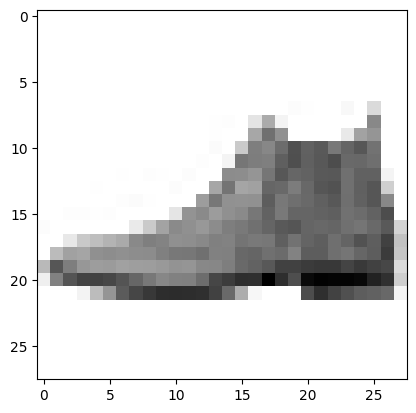

In [36]:
pi = 0
testI = x_test[pi].reshape((28,28,1))
testI = np.expand_dims(x_test[pi], 0)
predictions = modelCNN2.predict(testI)
print(predictions[0])
print(predictions[0].argmax(), predictions[0][predictions[0].argmax()])
print(test_labels[pi])
pI(testI[0])

In [37]:

modelCNN3 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [38]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelCNN3.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 50s 104ms/step - loss: 0.6772 - accuracy: 0.7535
Epoch 2/10
469/469 [==============================] - 49s 103ms/step - loss: 0.4486 - accuracy: 0.8387
Epoch 3/10
469/469 [==============================] - 47s 100ms/step - loss: 0.3980 - accuracy: 0.8578
Epoch 4/10
469/469 [==============================] - 46s 98ms/step - loss: 0.3712 - accuracy: 0.8670
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.3468 - accuracy: 0.8754
Epoch 6/10
469/469 [==============================] - 48s 103ms/step - loss: 0.3300 - accuracy: 0.8810
Epoch 7/10
469/469 [==============================] - 45s 97ms/step - loss: 0.3172 - accuracy: 0.8862
Epoch 8/10
469/469 [==============================] - 45s 97ms/step - loss: 0.3048 - accuracy: 0.8906
Epoch 9/10
469/469 [==============================] - 45s 97ms/step - loss: 0.2964 - accuracy: 0.8928
Epoch 10/10
469/469 [==============================] - 49s 104ms/step - loss:

In [39]:
test_loss, test_acc = modelCNN3.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 3s 11ms/step - loss: 0.2848 - accuracy: 0.8968
test_acc: 0.8967999815940857


# Few Notes

In [40]:
test = "12345"
print(f"{test=}")
print(f"{test}, {test=}")

test='12345'
12345, test='12345'
